# STOCK/CRPYTO PRICE PREDICTION MODEL

## The following code is an example on how to use simple data analysis tolls in order to set up a simple strategy for long and short term financial trading

### We will make use of the programing language python (3.x) which suits nicely for data anlysis

## --> This a very is simplified model for trading. One should always invest just as much money as one can afford to loose and do own studies in advance. 

## Required modules:
- numpy: the code is designed to be vectorized such that the numpy module can be used and calculations performed fast
- pandas: module for illustrative data frames
- yfinance: api module provided by yahoo finance to get current and previous asset prices
- matplotlib: (sub)module(s) for plots
- scipy: (sub)module for statistical and signal analysis
- datetime: (optional)

In [2]:
%load_ext autoreload
%autoreload 2

In [151]:
from model import MODEL
import utils, plotting, statistics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [152]:
tickers = ['TSLA', 'APPL', 'AMZN']
#fix this for eval_model():
tickers = 'TSLA'
model = MODEL(tickers=tickers)

In [153]:
start_date = '2020-01-01'
model.get_data(start=start_date, interval='60m')

[*********************100%***********************]  1 of 1 completed


In [154]:
#edit this:
day_hour = 15
day_minute = 30
time_zone = 'America/New_York'
#do not edit below this line:
start_date_range = pd.Timestamp(2020, 1, 1, day_hour, day_minute)
date_range = utils.create_date_range(start_date=start_date_range, tz=time_zone)
model.apply_date_filter(date_range)
model.data.tail()

[WARNING]: Filter would result in 35 NaN values.
[USER-INPUT]: Remove NaN values? [y/n]: y
[INFO]: filter applied.


,TSLA
Datetime,
2020-04-13 15:30:00-04:00,650.989929
2020-04-14 15:30:00-04:00,709.755005
2020-04-15 15:30:00-04:00,729.525391
2020-04-16 15:30:00-04:00,745.654480
2020-04-17 15:30:00-04:00,753.669983


In [155]:
model.eval_model()

|                                  PRICE MODEL                                   |
|                                  Version 0.3                                   |
|                   Authors: Marco Rosenzweig & Patrick Lorenz                   |
----------------------------------------------------------------------------------
|                               ticker = ['TSLA']                                |
|                             start date = 01/02/20                              |
|                              end date = 04/17/20                               |
|                      initial investment per ticker = 200                       |
[INIT]: Initialising model for tickers: ['TSLA']
[INIT]: Successfully initialized model.
**********************************************************************************
[TICKER]: TSLA
[INFO]: No tax paid.
----------------------------------------------------------------------------------
[SUMMARY]: Average trade win: 18.0873546919%


In [156]:
model.ticker_df['TSLA']

,Buy Dates,Sell Dates,Buy Prices,Sell Prices,Trade Reward,Trade Win,Trade Efficiency
0,2020-01-10 20:30:00,2020-01-14 20:30:00,479.346075,535.525200,223.439902,23.439902,0.117200
1,2020-01-17 20:30:00,2020-01-22 20:30:00,511.669553,566.810615,247.519336,24.079434,0.107767
2,2020-01-28 20:30:00,2020-02-04 20:30:00,568.463785,883.636459,384.751175,137.231839,0.554429
3,2020-02-06 20:30:00,2020-02-11 20:30:00,750.670650,770.459527,394.893831,10.142656,0.026362
4,2020-02-12 20:30:00,2020-02-19 20:30:00,769.665578,912.742006,468.302335,73.408504,0.185894
5,2020-02-25 20:30:00,2020-02-26 20:30:00,801.427404,775.217508,452.986966,-15.315368,-0.032704
6,2020-02-28 20:30:00,2020-03-04 20:30:00,669.345462,746.052300,504.899170,51.912203,0.114600
7,2020-03-09 19:30:00,2020-03-11 19:30:00,608.218756,630.989066,523.801433,18.902263,0.037438
8,2020-03-17 19:30:00,2020-03-25 19:30:00,431.247000,536.694783,651.880468,128.079035,0.244518
9,2020-04-02 19:30:00,2020-04-07 19:30:00,455.787964,542.911051,776.486300,124.605832,0.191148


In [ ]:
start_plot_range = pd.Timestamp(2020, 1, 1, day_hour, day_minute)
plot_range = utils.create_date_range(start_date=start_plot_range, tz=time_zone)
print(plot_range[-3:])

[INFO]: New sell signal was detected for last value: 753.6699829101562.


(<matplotlib.axes._subplots.AxesSubplot at 0x12dd34810>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12d4322d0>)

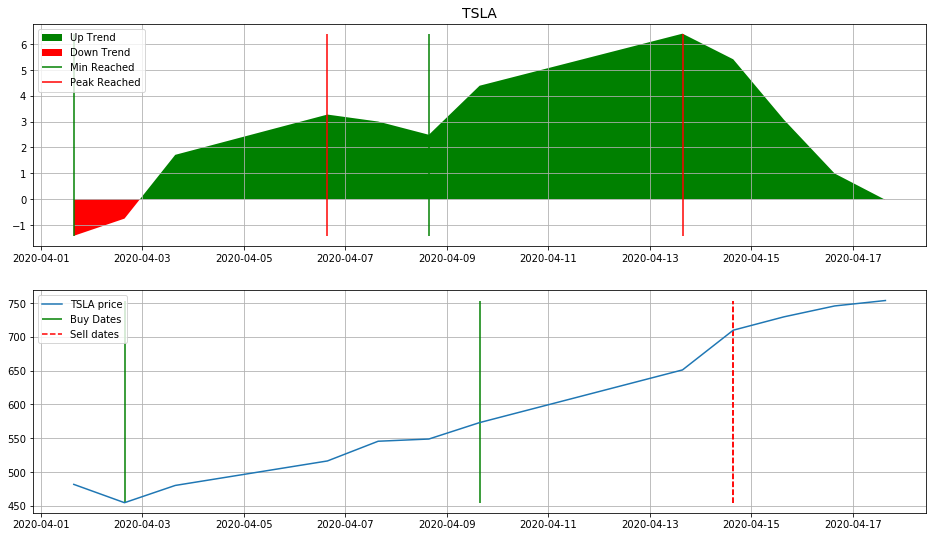

In [157]:
plotting.plot_model(model, plot_from_date='2020-04-01')

In [237]:
imag_model = model.copy_model()

In [238]:
imag_model.append_timedelta(timedelta=1)

[USER INPUT]: Overwrite existing data? y


In [239]:
imag_model.data

,TSLA
2020-01-02 15:30:00-05:00,430.239990
2020-01-03 15:30:00-05:00,442.750000
2020-01-06 15:30:00-05:00,451.400085
2020-01-07 15:30:00-05:00,469.170013
2020-01-08 15:30:00-05:00,492.089996
...,...
2020-04-14 15:30:00-04:00,709.755005
2020-04-15 15:30:00-04:00,729.525391
2020-04-16 15:30:00-04:00,745.654480
2020-04-17 15:30:00-04:00,753.669983


In [240]:
imag_model.comp_break_values(['TSLA'])

[INFO]: Compute break values with 30.00% deviation
[USER INPUT]: Append breaking values w.r.t smallest tolerances? n
[INFO]: Current values: {'TSLA': 753.6699829101562}
[INFO]: Break values: {'TSLA': [783.0631122437044, 814.8679855225195]}
[INFO]: Tolerances: {'TSLA': array([29.39312933, 61.19800261])}


In [241]:
imag_model.eval_model(tickers=['TSLA'])

|                                  PRICE MODEL                                   |
|                                  Version 0.3                                   |
|                   Authors: Marco Rosenzweig & Patrick Lorenz                   |
----------------------------------------------------------------------------------
|                               ticker = ['TSLA']                                |
|                             start date = 01/02/20                              |
|                              end date = 04/18/20                               |
|                      initial investment per ticker = 200                       |
[TICKER]: TSLA
[INFO]: No tax paid.
----------------------------------------------------------------------------------
[SUMMARY]: Average trade win: 18.0873546919%
[SUMMARY]: Average trade loss: -3.2704018254%
[SUMMARY]: Efficiency: 90.91%
[SUMMARY]: NET WIN: 754.60


In [242]:
imag_model.ticker_df['TSLA']

,Buy Dates,Sell Dates,Buy Prices,Sell Prices,Trade Reward,Trade Win,Trade Efficiency
0,2020-01-10 20:30:00,2020-01-14 20:30:00,479.346075,535.525200,223.439902,23.439902,0.117200
1,2020-01-17 20:30:00,2020-01-22 20:30:00,511.669553,566.810615,247.519336,24.079434,0.107767
2,2020-01-28 20:30:00,2020-02-04 20:30:00,568.463785,883.636459,384.751175,137.231839,0.554429
3,2020-02-06 20:30:00,2020-02-11 20:30:00,750.670650,770.459527,394.893831,10.142656,0.026362
4,2020-02-12 20:30:00,2020-02-19 20:30:00,769.665578,912.742006,468.302335,73.408504,0.185894
5,2020-02-25 20:30:00,2020-02-26 20:30:00,801.427404,775.217508,452.986966,-15.315368,-0.032704
6,2020-02-28 20:30:00,2020-03-04 20:30:00,669.345462,746.052300,504.899170,51.912203,0.114600
7,2020-03-09 19:30:00,2020-03-11 19:30:00,608.218756,630.989066,523.801433,18.902263,0.037438
8,2020-03-17 19:30:00,2020-03-25 19:30:00,431.247000,536.694783,651.880468,128.079035,0.244518
9,2020-04-02 19:30:00,2020-04-07 19:30:00,455.787964,542.911051,776.486300,124.605832,0.191148


In [243]:
for ticker in imag_model.tickers:
    print('Current ticker: {}'.format(ticker))
    print('Last 2 values in data set: {}'.format(imag_model.data[ticker].values[-2:]))
    print('Break values: {}'.format(imag_model.break_values[ticker]))
    print('Tolerances: {}'.format(imag_model.tolerances[ticker]))
    print('#' * 10)

Current ticker: TSLA
Last 2 values in data set: [753.66998291          nan]
Break values: [783.0631122437044, 814.8679855225195]
Tolerances: [29.39312933 61.19800261]
##########


In [244]:
imag_model._init_model()
imag_model.data.tail(1)

[INIT]: Initialising model for tickers: ['TSLA']
[INIT]: Successfully initialized model.
**********************************************************************************


,TSLA
2020-04-18 15:30:00-04:00,NaN


[INFO]: New sell signal was detected for last value: nan.


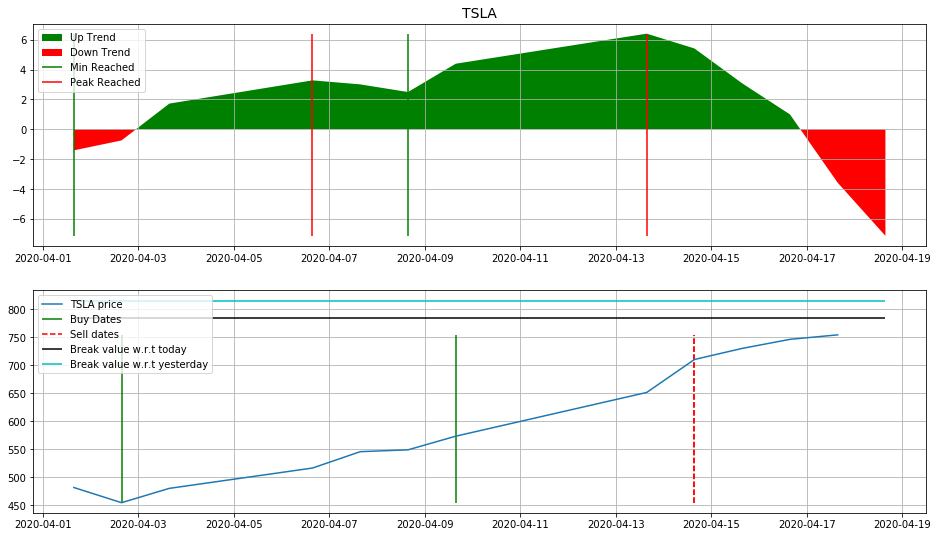

In [245]:
ax1, ax2 = plotting.plot_model(imag_model, plot_from_date='2020-04-01')

[INFO]: Current ticker: TSLA
----------------------------------------------------------------------------------
[INFO]: New sell signal was detected for last value: 743.9099566315191.
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------


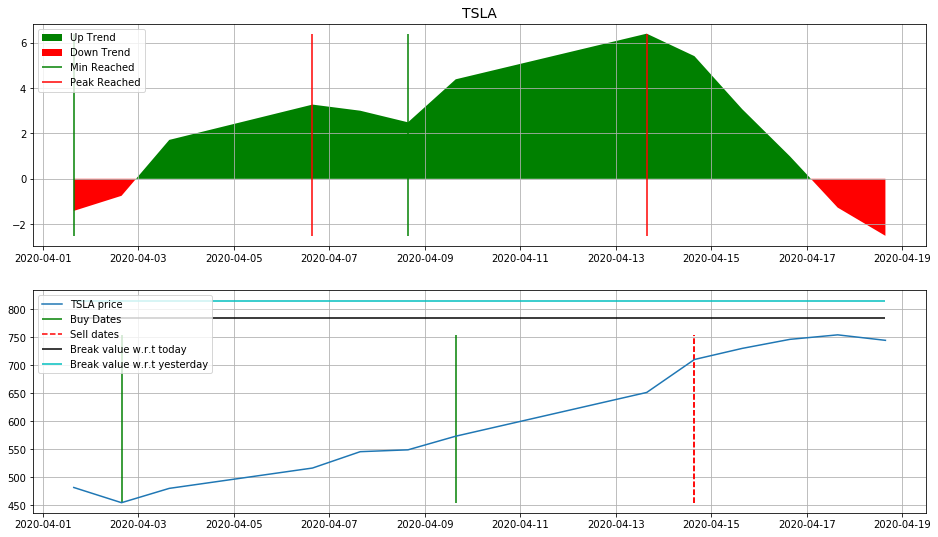

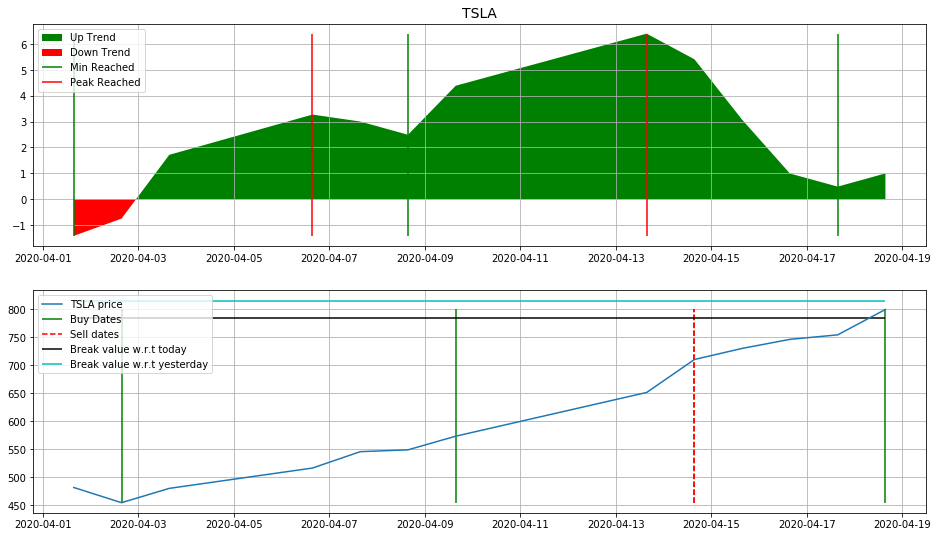

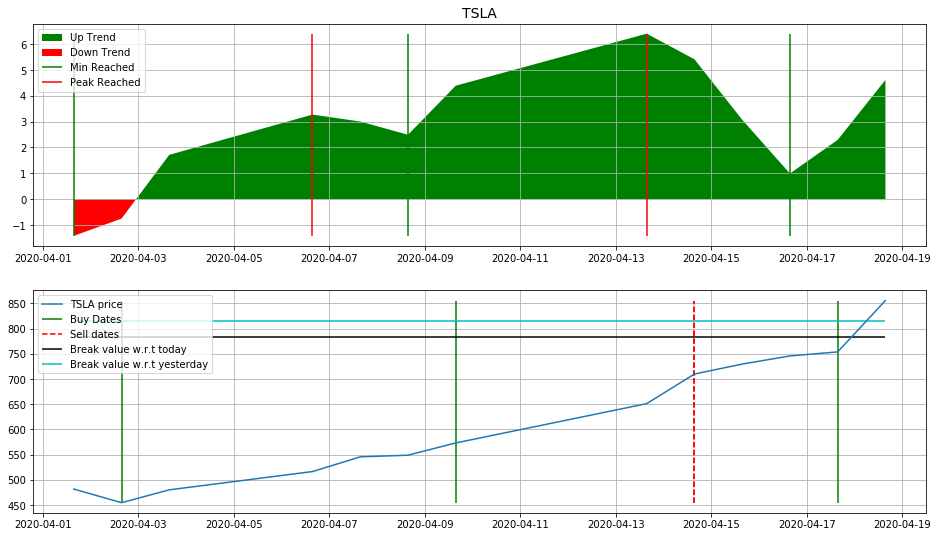

In [247]:
imag_model.show_possibilities(plot_from_date='2020-04-01')

In [264]:
stats_data = utils.download_data(tickers='TSLA', start='2019-01-01', interval='60m')

[*********************100%***********************]  1 of 1 completed


Probability for reaching smallest tolerance: nan%
Probability for reaching highest tolerance: nan%
Probability between: nan%


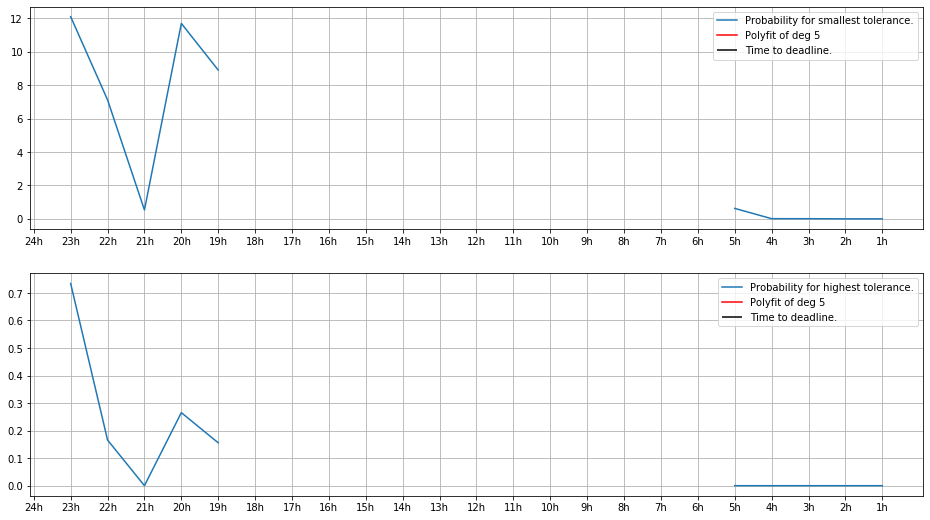

In [265]:
statistics.calc_probs(model=imag_model, stats_data=stats_data, timezone=time_zone, start=pd.Timestamp(2019, 1, 1, 0, 30))

In [ ]:
#TODO: Implement this: 
#from model import STATISTICAL_MODEL
#stat_model = STATISTICAL_MODEL(imag_model)